# Data exploration by region

## Reading in dataset using pandas

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../dataset.csv')
df = df.dropna()
df = df.drop(columns=['Row ID', 'Order ID'])  # Drops unnecessary columns
df

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1/3/19,1/7/19,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2.0,0.2,5.5512
1,1/4/19,1/8/19,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2.0,0.8,-5.4870
2,1/4/19,1/8/19,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3.0,0.2,4.2717
3,1/4/19,1/8/19,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3.0,0.2,-64.7748
4,1/5/19,1/12/19,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3.0,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32479,6/28/18,7/2/18,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,Georgia,30080,South,OFF-BI-10002867,Office Supplies,Binders,GBC Recycled Regency Composition Covers,119.560,2.0,0.0,54.9976
32480,6/28/18,7/2/18,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,Georgia,30080,South,OFF-AR-10000538,Office Supplies,Art,"Boston Model 1800 Electric Pencil Sharpener, Gray",140.750,5.0,0.0,42.2250
32481,9/6/18,9/9/18,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980,1.0,0.0,22.3548
32482,5/17/18,5/23/18,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,New York,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10.0,0.0,15.1200


## States with the most discounts

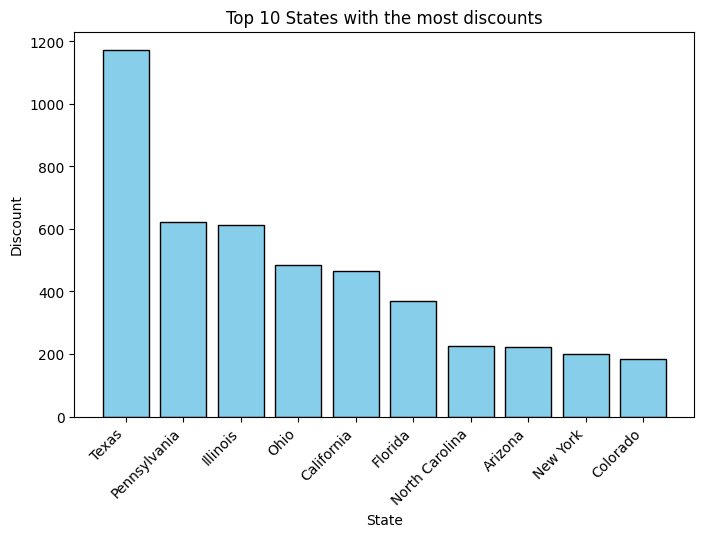

In [59]:
discount = df[['State', 'Discount']].groupby('State', as_index=False).sum()

# Groups states together with the sum of discounts for each state
top_10_discount = discount.sort_values(by='Discount', ascending=False).head(10)  # Variable stores states with the 10 highest discounts

# Plotting the barchart
plt.figure(figsize=(8, 5))
plt.bar(top_10_discount['State'], top_10_discount['Discount'], color='skyblue', edgecolor='black')
plt.title('Top 10 States with the most discounts')
plt.xlabel('State')
plt.ylabel('Discount')
plt.xticks(rotation=45, ha='right')
plt.show()

## States with no discounts

In [60]:
discount_mask = discount['Discount'] == 0  # Boolean mask
zero_discount_states = discount[discount_mask]  # Implements mask to filter out states where discount == 0 is false, so states with discounts

print("States with 0 profit:")
print(zero_discount_states['State'].tolist())

States with 0 profit:
['Alabama', 'Arkansas', 'District of Columbia', 'Georgia', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'Newfoundland and Labrador', 'North Dakota', 'Oklahoma', 'South Carolina', 'South Dakota', 'Vermont', 'Virginia', 'Wisconsin']


Based on these results, we can outline states that experience enough discounting and states where discounts still need to be introduced. Discouting could perhaps be reduced in Texas.

## Profit map for each American state

In [61]:
import folium

profit_by_state = df[['State', 'Profit']].groupby('State', as_index=False).sum()

# Load GeoJSON data
geo_data = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

# Create a base map
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Create the choropleth map
folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=profit_by_state,
    columns=['State', 'Profit'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Profit by State'
).add_to(m)

# Saves the map to a html file
m.save('choropleth_map.html')
m

Combining this visualisation of the states with the top 10 states that have the most discounts, the efficiency of the discounts can be evaluated. For example, Texas has the most discounts out of any states and is also one of the states with least profit, with overall losses being made on products. Illinois is also simialar to Texas. However, California and New York are also some of the states with the most discounts, but they are also the 2 states that generate the most profit. The effectiveness of discounts gives mixed results in terms of profit.